In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing and reading diabetes dataset
diabetes_df = pd.read_csv('diabetes_datasets/pima_diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Statistics

In [3]:
# Show of features and data-type
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Statistical summary of diabetes dataset
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Count of null values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualization

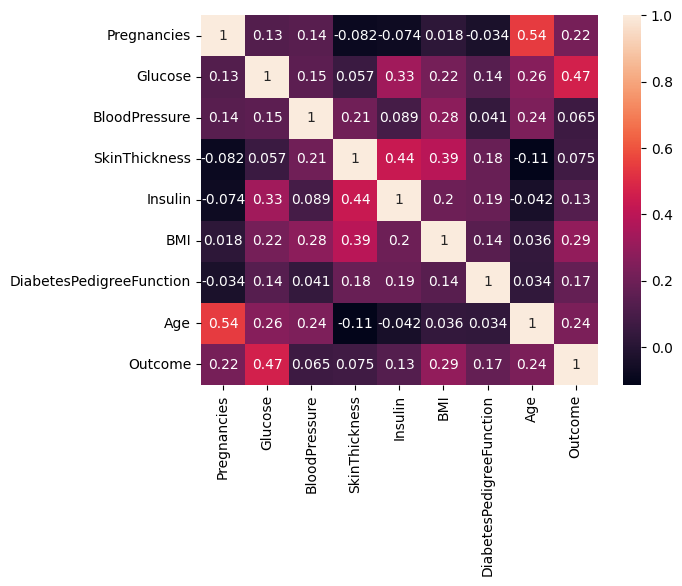

In [6]:
# Correlation heatmap of features to Outcome
sns.heatmap(diabetes_df.corr(), annot = True)
plt.show()


# Preprocessing

In [7]:
# Create a new dataframe
outcome_df = diabetes_df

In [8]:
# replacing zero values with NaN
outcome_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = outcome_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [9]:
# Count of NaN
outcome_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# Replacing NaN with mean values
outcome_df["Glucose"].fillna(outcome_df["Glucose"].mean(), inplace = True)
outcome_df["BloodPressure"].fillna(outcome_df["BloodPressure"].mean(), inplace = True)
outcome_df["SkinThickness"].fillna(outcome_df["SkinThickness"].mean(), inplace = True)
outcome_df["Insulin"].fillna(outcome_df["Insulin"].mean(), inplace = True)
outcome_df["BMI"].fillna(outcome_df["BMI"].mean(), inplace = True)

In [11]:
# Statistical summary of dataset with replaced values
outcome_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [12]:
# Export new csv file
#outcome_df.to_csv('diabetes-outcome.csv')

### Test #1: Using the Random Forest Algorithm to predict the Outcome with Glucose, BMI, Age, Insulin as key features

In [13]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
outcome_scaled_df = sc.fit_transform(outcome_df)

In [14]:
outcome_scaled_df = pd.DataFrame(outcome_scaled_df)

In [15]:
# Selected features - [Glucose, Insulin, BMI, Age]
X = outcome_scaled_df.iloc[:, [1, 4, 5, 7]].values
Y = outcome_scaled_df.iloc[:, 8].values

In [16]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = outcome_df['Outcome'])


In [17]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Data Modeling

In [18]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [19]:
# prediction on dataset
predict_random_forest = random_forest.predict(X_test)
predict_random_forest

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0.])

In [20]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
random_forest_accuracy = accuracy_score(Y_test, predict_random_forest)

In [21]:
# print results
print("Random Forest: " + str(random_forest_accuracy * 100))

Random Forest: 75.97402597402598


In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict_random_forest)
cm

array([[84, 16],
       [21, 33]], dtype=int64)

<Axes: >

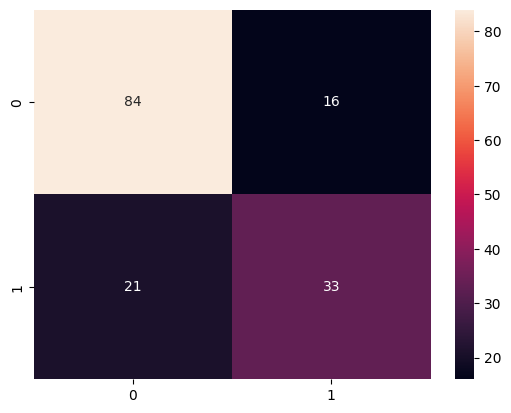

In [23]:
# Heatmap of Confusion matrix using key features
sns.heatmap(pd.DataFrame(cm), annot=True)

In [24]:
# Classification report for test #1
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict_random_forest))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       100
         1.0       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



### Test #2: Using the Random Forest Algorithm to predict the Outcome with Pregnancy, BMI, Age, Blood Pressure as key features.

In [25]:
# Selected features - [Glucose, Insulin, BMI, Age]
X = outcome_scaled_df.iloc[:, [0, 2, 5, 7]].values
Y = outcome_scaled_df.iloc[:, 8].values

In [26]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = outcome_df['Outcome'])


In [27]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [28]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [29]:
# prediction on dataset
predict_random_forest = random_forest.predict(X_test)
predict_random_forest

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0.])

In [30]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
random_forest_accuracy = accuracy_score(Y_test, predict_random_forest)

In [31]:
# print results
print("Random Forest: " + str(random_forest_accuracy * 100))

Random Forest: 70.12987012987013


In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predict_random_forest)
cm

array([[78, 22],
       [24, 30]], dtype=int64)

<Axes: >

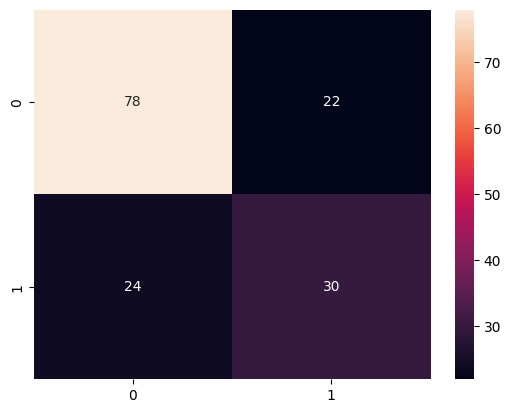

In [33]:
# Heatmap of Confusion matrix using key features
sns.heatmap(pd.DataFrame(cm), annot=True)

In [34]:
# Classification report for test #2
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict_random_forest))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       100
         1.0       0.58      0.56      0.57        54

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154

